<a name = "content"> </a>
# **Лабораторная работа №2**

## Брысов Александр
### М8О-409Б-18
----

### [1. Задание](#step1)

### [2. Необходимые функции](#step2)

### [3. Аналитическое решение](#step3)

### [4. Явная конечно-разностная схема](#step4)

### [5. Неявная конечно-разностная схема](#step5)

<a name = "step1"></a>
# Задание
[К началу](#content)

Используя явную схему крест и неявную схему, решить начально-краевую задачу для дифференциального уравнения гиперболического типа. Аппроксимацию второго начального условия произвести с первым и со вторым порядком. Осуществить реализацию трех вариантов аппроксимации граничных условий, содержащих производные: двухточечная аппроксимация с первым порядком, трехточечная аппроксимация со вторым порядком, двухточечная аппроксимация со вторым порядком. В различные моменты времени вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением $U(x,t)$. Исследовать зависимость погрешности от сеточных параметров $\tau, h$.

Начально-краевая задача для дифференциального уравнения гиперболического типа:
$$\begin{aligned}
& \frac{\partial^2 u}{\partial t^2} = \frac{\partial^2 u}{\partial x^2} - 3u, \\
&u(0,t) = \sin(2t)\\
&u(\pi,t) = -\sin(2t)\\
&u(x,0) = 0\\
&u_t(x,0) = 2\cos x
\end{aligned}$$

Аналитическое решение: $U(x,t) = \cos{x} \sin{(2t)}$

<a name = "step2"></a>
# Необходимые функции

[К началу](#content)

In [11]:
import matplotlib.patches as mpatches
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [12]:
def border_con_0t(t):
    return math.sin(2*t)
def border_con_pit(t):
    return -math.sin(2*t)
def initial_con1(x,t = None):
    return 0
def initial_con2(x,t = None):
    return 2*math.cos(x)
def analytic(x,t):
    return math.cos(x)*math.sin(2*t)

In [13]:

def fill_initial_con(h, tau, N, K, a, approx_order): 
    U = np.zeros([K, N])

    tmp_x = x0
    for j in range(N):
        U[0][j] = border_con_0t(tmp_x)
		
        if approx_order == 1:
            U[1][j] = border_con_0t(tmp_x) + border_con_pit(tmp_x)*tau
			
        if approx_order == 2:
            U[1][j] = border_con_0t(tmp_x) + border_con_pit(tmp_x)*tau + (-4*np.cos(tmp_x))*tau**2/2
				
        tmp_x += h
    
    return U
  

In [14]:
def error_norm(x,t,a,u):
    errors = []
    for i in range(len(u)):
        maximum = 0
        for j in range(len(u[0])):
            tmp = abs(u[i][j] - analytic(x[j], t[i]))
            if maximum < tmp:
                maximum = tmp
        errors.append(maximum)
    return errors


In [15]:
def TMA(a, b, c, d, s):
    P = np.zeros(s)
    Q = np.zeros(s)

    P[0] = -c[0] / b[0]
    Q[0] = d[0] / b[0]

    k = s - 1

    for i in range(1, s):
        P[i] = -c[i] / (b[i] + a[i] * P[i - 1])
        Q[i] = (d[i] - a[i] * Q[i - 1]) / (b[i] + a[i] * P[i - 1])
    P[k] = 0
    Q[k] = (d[k] - a[k] * Q[k - 1]) / (b[k] + a[k] * P[k - 1])

    x = np.zeros(s)
    x[k] = Q[k]

    for i in range(s - 2, -1, -1):
        x[i] = P[i] * x[i + 1] + Q[i]
    return x

<a name = "step3"></a>
# Аналитическое решение

[К началу](#content)

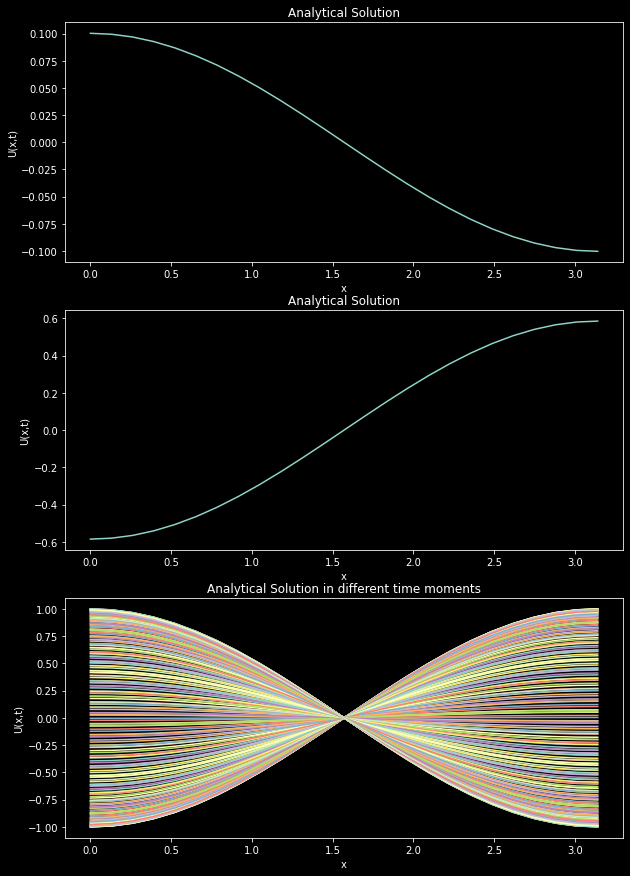

In [16]:
N = 25
T = 10
K = 200

u_anlt = np.zeros((K,N))
x0 = 0
xl = math.pi
h = (xl-x0)/(N-1)
tau = T/(K-1)

x = np.arange(x0,xl+h-0.0001,h)

if tau/h > 1:
    print("courant condition error: sigma > 1")

for k in range(K):
    for j in range(N):
        u_anlt[k][j] = analytic(j * h, k * tau)

fig = plt.figure(figsize=(10, 15))
plt.subplot(3,1,1)
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.title(f'Analytical Solution')
plt.plot(x, u_anlt[1])
plt.subplot(3,1,2)
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.title(f'Analytical Solution')
plt.plot(x, u_anlt[100])
plt.subplot(3,1,3)
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.title('Analytical Solution in different time moments')
for k in range(1, len(u_anlt)):
    plt.plot(x,u_anlt[k])

<a name = "step4"></a>
# Явная конечно-разностная схема

[К началу](#content)

In [17]:

def explicit(T, N, K, x0, xl, pde_c, approx_order): 

    h = (xl - x0) / (N - 1)
    tau = T / (K - 1)
    U = fill_initial_con(h, tau, N, K, 1, approx_order)
    sigma = tau**2 / h**2
	
    for k in range(1, K - 1):
        for j in range(1, N - 1):

            U[k + 1][j] = \
            U[k][j + 1] *(sigma) +\
            U[k][j] * (2 - 2*sigma + pde_c*tau**2) + \
            U[k][j - 1] *(sigma) + \
            U[k - 1][j] * (-1)
       
            U[k+1][0] = border_con_0t((k+1) * tau)
            U[k+1][N-1] = border_con_pit((k+1) * tau) 
    return U


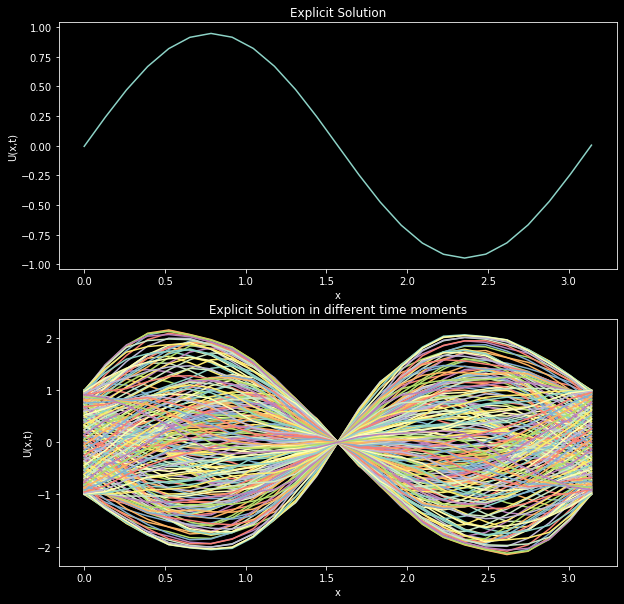

In [32]:

u_expl = explicit(10, 25, 200, 0, math.pi, -3, 2) 
fig = plt.figure(figsize=(10, 10))
h = (xl-x0)/(N-1)
x = np.arange(x0,xl+h-0.0001,h)
plt.subplot(2,1,1)
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.title(f'Explicit Solution')
plt.plot(x, u_expl[1])
#plt.subplot(3,1,2)
#plt.xlabel('x')
#plt.ylabel('U(x,t)')
#plt.title(f'Explicit Solution')
#plt.plot(x, u_expl[9])
plt.subplot(2,1,2)
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.title('Explicit Solution in different time moments')
for k in range(2, len(u_expl)):
    plt.plot(x,u_expl[k])


In [ ]:
fig = plt.figure(figsize=(20, 10))
k = 1
t = np.arange(0, T + tau - 0.0001, tau)
for i in range(int(len(u_expl) / 6), int(len(u_expl)/2), int(len(u_expl) / 8)):
    plt.subplot(1,3,k)
    k += 1
    plt.xlabel('x')
    plt.ylabel('U')
    plt.title(f't = {t[i]}')
    a_ = mpatches.Patch(color = 'violet', label = 'Explicit Solution')
    b_ = mpatches.Patch(color = 'red', label = 'Exact Answer')
    plt.legend(handles=[a_,b_])
    plt.plot(x, u_expl[i], color = 'violet')
    plt.plot(x,u_anlt[i], color = 'red')

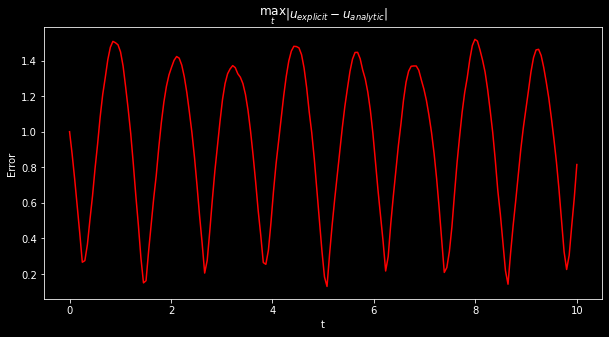

In [20]:
er_expl = error_norm(x,t,1,u_expl)
fig = plt.figure(figsize=(10, 5))
plt.plot(t, er_expl, color = 'red')
plt.xlabel('t')
plt.ylabel('Error')
plt.title(r'$\max_{t} \left|u_{explicit} - u_{analytic}\right|$')
plt.show()

In [80]:
'''
def explicit(N, K, T, approx_order, pde_c = -3): #leha
    space_step = (math.pi/2)/N
    time_step = T/K
    x = np.arange(0, math.pi/2 + space_step - 1e-4, space_step)#[0 + space_step*i for i in range(N)]
    t = np.arange(0, T + time_step - 1e-4, time_step)#[0 + time_step*i for i in range(K)]
    K = len(t)
    N = len(x)
    u = fill_initial_con(space_step, time_step, N, K, 1, approx_order)
    b_ = 0
    c_ = pde_c
    sigma = 1 * time_step**2 / space_step**2
    d = 2
    T_ = []
    X = []
    X = [x, x]
    T_.append([0.0 for _ in x])
    T_.append([time_step for _ in x])
    for k in range(1, K-1):
        for j in range(1, N - 1):
            u[k + 1][j] = \
                u[k][j + 1] *(sigma + time_step**2*b_/(2*space_step))/(d*time_step/2+1) +\
                u[k][j] * (2 - 2*sigma + c_*time_step**2) /(d*time_step/2+1) + \
                u[k][j - 1] *(sigma - time_step**2*b_/(2*space_step))/(d*time_step/2+1) + \
                (u[k - 1][j] * (-1)*(1 - d*time_step/2))/(d*time_step/2+1)
        u[k+1][0] = border_con_0t(time_step*k)
        u[k+1][-1] = border_con_pit(time_step*k)
        X.append(x)
        T_.append([t[k] for _ in x])
    return u
'''

In [ ]:
'''
u_expl = explicit(25, 200, 10, 2, -3) #leha
fig = plt.figure(figsize=(10, 15))
h = (xl-x0)/N
x = np.arange(0, math.pi + h - 1e-4, h)
plt.subplot(3,1,1)
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.title(f'Explicit Solution')
plt.plot(x, u_expl[0])
plt.subplot(3,1,2)
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.title(f'Explicit Solution')
plt.plot(x, u_expl[-1])
plt.subplot(3,1,3)
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.title('Explicit Solution in different time moments')
for k in range(2, len(u_expl)):
    plt.plot(x,u_expl[k])
'''

<a name = "step5"></a>

# Неявная конечно-разностная схема

[К началу](#content)

In [21]:
def implicit(T, N, K, x0, xl, pde_c, approx_order):

    h = (xl - x0) / (N - 1)
    tau = T / (K - 1)


    U = fill_initial_con(h, tau, N, K, 1, approx_order)

    sigma = tau**2 / h**2

    all = np.zeros([N,N])
    for k in range(1, K - 1):
        a = np.zeros(N)
        b = np.zeros(N)
        c = np.zeros(N)
        d = np.zeros(N)

        for j in range(1, N - 1):
            a[j] = -sigma
            b[j] = (1 + 2*sigma)
            c[j] = -sigma
            d[j] = U[k - 1][j]*(- 1) + 2*U[k][j] + U[k][j]*pde_c*tau**2

        b[0] = 1
        c[0] = 0
        d[0] = border_con_0t((k+1) * tau)

        a[N - 1] = 0
        b[N - 1] = 1
        d[N - 1] = border_con_pit((k+1) * tau)  
            
        Y = TMA(a, b, c, d, N)
        
        U[k + 1] = Y

    return U

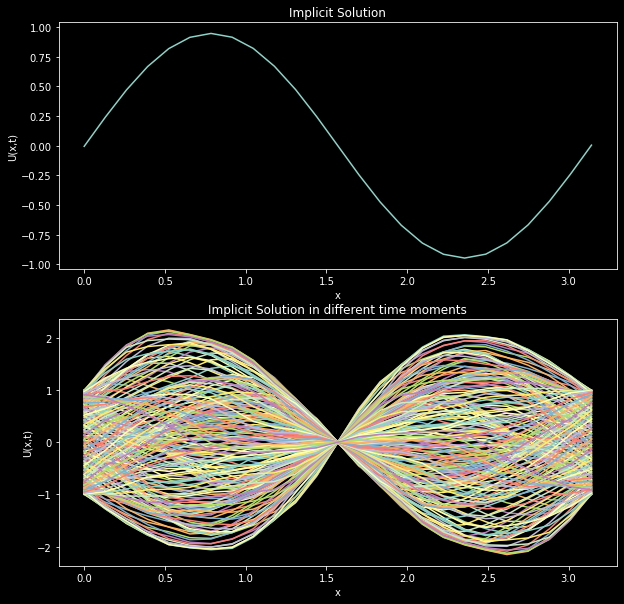

In [30]:
x0 = 0
u_impl = implicit(10, 25, 200, 0, math.pi, -3, 0) 
fig = plt.figure(figsize=(10, 10))
h = (xl-x0)/(N-1)
x = np.arange(x0,xl+h-0.0001,h)
plt.subplot(2,1,1)
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.title(f'Implicit Solution')
plt.plot(x, u_expl[1])
#plt.subplot(3,1,2)
#plt.xlabel('x')
#plt.ylabel('U(x,t)')
#plt.title(f'Implicit Solution')
#plt.plot(x, u_expl[9])
plt.subplot(2,1,2)
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.title('Implicit Solution in different time moments')
for k in range(2, len(u_expl)):
    plt.plot(x,u_expl[k])

In [ ]:
fig = plt.figure(figsize=(20, 10))
k = 1
t = np.arange(0, T + tau - 0.0001, tau)
for i in range(int(len(u_impl) / 6), int(len(u_impl)/2), int(len(u_impl) / 8)):
    plt.subplot(1,3,k)
    k += 1
    plt.xlabel('x')
    plt.ylabel('U')
    plt.title(f't = {t[i]}')
    a_ = mpatches.Patch(color = 'violet', label = 'Implicit Solution')
    b_ = mpatches.Patch(color = 'red', label = 'Exact Answer')
    plt.legend(handles=[a_,b_])
    plt.plot(x, u_impl[i], color = 'violet')
    plt.plot(x,u_anlt[i], color = 'red')

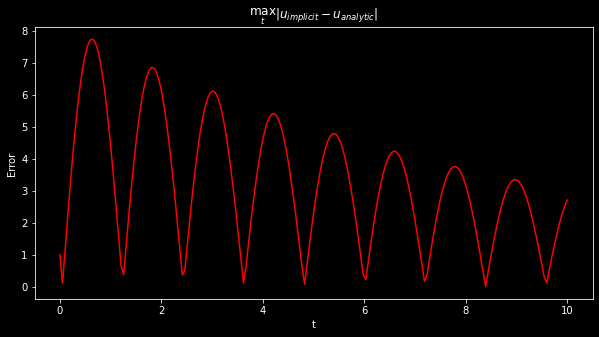

In [28]:
er_expl = error_norm(x,t,1,u_impl)
fig = plt.figure(figsize=(10, 5))
plt.plot(t, er_expl, color = 'red')
plt.xlabel('t')
plt.ylabel('Error')
plt.title(r'$\max_{t} \left|u_{implicit} - u_{analytic}\right|$')
plt.show()